## Linear Regression

### PyTorch Model Designing Steps

1.   **Design your model using class with Variables**
2.   **Construct loss and optimizer  (select from PyTorch API)**
3.   **Training cycle (forward, backward, update)**

### Step #1 : Design your model using class with Variables

In [ ]:
from torch import nn
import torch
from torch import tensor

import matplotlib.pyplot as plt

x_data = tensor([[1.0], [2.0], [3.0], [4.0], [5.0], [6.0]])
y_data = tensor([[2.0], [4.0], [6.0], [8.0], [10.0], [12.0]])

# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.01

In [ ]:
print(torch.__version__)

print(torch.cuda.get_device_name())

1.7.0+cu101
Tesla T4


### Using GPU for the PyTorch Models

Remember always 2 things must be on GPU

- model
- tensors

In [ ]:
class Model(nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate nn.Linear module
        """
        super().__init__()
        self.linear = torch.nn.Linear(input_size, output_size)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        y_pred = self.linear(x)
        return y_pred


# our model
model = Model()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

### Explanations:- 

`torch.nn.Linear(in_features, out_features, bias=True)`

Applies a linear transformation to the incoming data: $y = W^T * x + b$

**Parameters:**

- `in_features `– size of each input sample (i.e. size of x)
- `out_features` – size of each output sample (i.e. size of y)
- `bias` – If set to False, the layer will not learn an additive bias. **Default: True**


###Step #2 : Construct loss and optimizer (select from PyTorch API)

In [ ]:
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Explanations:- 

MSE Loss: Mean Squared Error (**Default: 'mean'**)

- $\hat y$ :  prediction
- $y$ :  true value

$MSE \ (sum) =  \sum_{i=1}^n(\hat y_i - y_i)^2$

$MSE \ (mean) = \frac{1}{n} \sum_{i=1}^n(\hat y_i - y_i)^2$

###Step #3 : Training: forward, loss, backward, step

In [ ]:
# Credit: https://github.com/jcjohnson/pytorch-examples

# Training loop
for epoch in range(num_epochs):
    # 1) Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data.to(device))

    # 2) Compute and print loss
    loss = criterion(y_pred, y_data.to(device))
    print(f'Epoch: {epoch} | Loss: {loss.item()} ')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    # Getting gradients w.r.t. parameters
    loss.backward()
    # Updating parameters
    optimizer.step()


# After training
hour_var = tensor([[7.0]]).to(device)
y_pred = model(hour_var)
print("Prediction (after training)",  7, model(hour_var).data[0][0].item())

Epoch: 0 | Loss: 0.04414632171392441 
Epoch: 1 | Loss: 0.037211932241916656 
Epoch: 2 | Loss: 0.03136666119098663 
Epoch: 3 | Loss: 0.02643958479166031 
Epoch: 4 | Loss: 0.022286424413323402 
Epoch: 5 | Loss: 0.01878545433282852 
Epoch: 6 | Loss: 0.015834316611289978 
Epoch: 7 | Loss: 0.013346947729587555 
Epoch: 8 | Loss: 0.011250494979321957 
Epoch: 9 | Loss: 0.00948311947286129 
Epoch: 10 | Loss: 0.007993534207344055 
Epoch: 11 | Loss: 0.006737751420587301 
Epoch: 12 | Loss: 0.005679425783455372 
Epoch: 13 | Loss: 0.00478725228458643 
Epoch: 14 | Loss: 0.004035332705825567 
Epoch: 15 | Loss: 0.0034015250857919455 
Epoch: 16 | Loss: 0.0028671536128968 
Epoch: 17 | Loss: 0.002416762989014387 
Epoch: 18 | Loss: 0.002037121681496501 
Epoch: 19 | Loss: 0.001717082574032247 
Epoch: 20 | Loss: 0.0014473588671535254 
Epoch: 21 | Loss: 0.0012200772762298584 
Epoch: 22 | Loss: 0.0010285326279699802 
Epoch: 23 | Loss: 0.0008669731905683875 
Epoch: 24 | Loss: 0.0007308223284780979 
Epoch: 25 | 

### Explanations:- 

- Calling `.backward()` mutiple times accumulates the gradient (**by addition**) for each parameter. 

- This is why you should call `optimizer.zero_grad()` after each .step() call. 

- Note that following the first `.backward` call, a second call is only possible after you have performed another **forward pass**.

- `optimizer.step` performs a parameter update based on the current gradient (**stored in .grad attribute of a parameter**)

### Simplified equation:-

- `parameters = parameters - learning_rate * parameters_gradients`
- parameters $W$ and $b$ in ($y = W^T * x + b$)
- $\theta = \theta - \eta \cdot \nabla_\theta$  [ General parameter $\theta$ ]
  *  $\theta$ : parameters (our variables)
  *  $\eta$ : learning rate (how fast we want to learn)
  *  $\nabla_\theta$ : parameters' gradients

  

### Plot of predicted and actual values

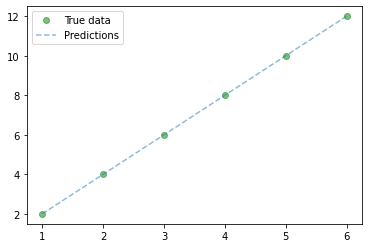

In [ ]:
# Clear figure
plt.clf()

# Get predictions
predictions = model(x_data.to(device)).cpu().detach().numpy()

# Plot true data
plt.plot(x_data, y_data, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_data, predictions, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

### Saving Model to Directory 

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

root_path = '/content/gdrive/My Drive/AUST Docs/AUST Teaching Docs/AUST Spring 2020/CSE 4238/Lab 02/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Save Model

In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'linear_regression.pkl') 

# Save the model checkpoint 
# torch.save(model.state_dict(), root_path + 'linear_regression.ckpt')


### Load Model

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'linear_regression.pkl'))

### Try Other Optimizers

- torch.optim.Adagrad
- torch.optim.Adam
- torch.optim.Adamax
- torch.optim.ASGD
- torch.optim.LBFGS
- torch.optim.RMSprop
- torch.optim.Rprop
- torch.optim.SGD


### *** Official PyTorch Tutorials ***

https://pytorch.org/tutorials/